# Drug/Alcohol Use by State
## Jonathan Licht and Jim Haines
### https://jlicht27.github.io/

# Overview

Our team members Jim Haines and Jonathan Licht have chosen an initial dataset concerning usage rates of different drugs by state over time. The data set can be found [here](https://corgis-edu.github.io/corgis/csv/drugs/). The dataset includes an entry for each state from the years 2002 - 2018. The unit of observation in the dataset is a state in a certain year, each entity contains the state, year, and the populations in that state and year in age ranges 12-17, 18-25, and 26+. In addition, the raw number of users of each drug (alcohol, tobacco, marijuana, and cocaine) are given by age range for each unit of observation as well as the rates of usage for each drug in each entity. We decided these raw numbers are not very useful as populations vary greatly by state so these values would not offer much insight because we want to compare states to each other. The rates are our main focus as they are a more effective way to compare usage across states.

From this initial dataset we hope to answer the question of what states have higher usage rates of drugs? From there we will include more datasets in an attempt to identify why these states have higher usage rates as well as what the impact of these higher usage rates is. We feel that this dataset is a good starting point from which we can draw from many other datasets to make connections. Drug usage rates can be attributed to many factors. We hope to find and explain at least some of these factors by using related data sets. One of our current hypotheses involves using drugs as an escape or as a distraction, a rationalization that may be more prevalent in people who live in more rural areas and thus have less social interaction. Drug usage can also have a large impact on societies, and we believe that looking at usage by state may offer some insight into the consequences of higher or lower usage rates. We have considered some preliminary ideas for other data sets to include. One such is incarceration rates for drug usage/position by state. This data might help explain the overall impact drug usage has had on a certain state over time. Another possible data set is one containing data on family situation by state. We would look for a dataset that details income, family size, parenting situation, location of residence, and possibly more factors in an attempt to draw connections between these attributes and drug usage rates/incarceration rates as previously explained.

In order to make the data more usable, we will create a method to obtain a copy of a certain section that is relevant to our current analysis. One example of this is excluding the actual population values from the data table because these values are not very useful. Our table conforms with tidy data guidelines and we did not have to change many aspects to achieve this. We decided that the State and Year are the best options by which to index the data in most situations. This ensures there are no repeated indexes and allows us to clearly see both changes by state and over time. 

## Collaboration plan
We will use a GitHub repository to store our data and notebook that contains our analysis. We are using a jupyter notebook to conduct the majority of our analysis. We have used tools like pandas and matplotlib to provide some summary stats, and we plan to use other plotting software like Seaborn to make clear and concise visualizations. The final version of our project will be available on a github.io webpage that is linked above.



In [1]:
import pandas as pd
drugs = pd.read_csv("drugs.csv")

Below, find the table we just imported.

In [2]:
drugs

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,Rates.Alcohol.Use Disorder Past Year.12-17,Rates.Alcohol.Use Disorder Past Year.18-25,...,Totals.Marijuana.Used Past Year.26+,Rates.Marijuana.Used Past Year.12-17,Rates.Marijuana.Used Past Year.18-25,Rates.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,Rates.Tobacco.Use Past Month.12-17,Rates.Tobacco.Use Past Month.18-25,Rates.Tobacco.Use Past Month.26+
0,Alabama,2002,380805,499453,2812905,18,68,138,0.048336,0.136490,...,141,0.127535,0.237880,0.050275,63,226,930,0.166578,0.451976,0.330659
1,Alaska,2002,69400,62791,368460,4,12,27,0.061479,0.187891,...,46,0.188730,0.389026,0.124566,11,30,112,0.163918,0.484270,0.304220
2,Arizona,2002,485521,602265,3329482,36,117,258,0.073819,0.193626,...,215,0.169646,0.275435,0.064640,73,240,1032,0.151071,0.397968,0.309969
3,Arkansas,2002,232986,302029,1687337,14,53,101,0.061457,0.175913,...,104,0.157567,0.288856,0.061510,46,169,660,0.195714,0.558846,0.391210
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,0.141067,0.282887,0.078068,290,1377,4721,0.092235,0.351353,0.220699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,Virginia,2018,629725,869285,5581639,10,82,267,0.015199,0.094035,...,518,0.096489,0.329603,0.092889,28,266,1234,0.045116,0.305545,0.221150
863,Washington,2018,545968,738052,5065742,11,75,282,0.020069,0.101770,...,1199,0.163818,0.454971,0.236665,20,163,1150,0.037481,0.220519,0.227040
864,West Virginia,2018,124659,174236,1235448,2,15,46,0.017428,0.087561,...,144,0.121996,0.330921,0.116328,10,70,438,0.081434,0.400053,0.354690
865,Wisconsin,2018,442510,615930,3861670,8,74,217,0.018720,0.120776,...,466,0.120078,0.326326,0.120566,17,157,917,0.038051,0.254571,0.237359


Below, find all the dtypes for the table. Pandas correctly interpretted all of them.

In [3]:
drugs.dtypes

State                                                 object
Year                                                   int64
Population.12-17                                       int64
Population.18-25                                       int64
Population.26+                                         int64
Totals.Alcohol.Use Disorder Past Year.12-17            int64
Totals.Alcohol.Use Disorder Past Year.18-25            int64
Totals.Alcohol.Use Disorder Past Year.26+              int64
Rates.Alcohol.Use Disorder Past Year.12-17           float64
Rates.Alcohol.Use Disorder Past Year.18-25           float64
Rates.Alcohol.Use Disorder Past Year.26+             float64
Totals.Alcohol.Use Past Month.12-17                    int64
Totals.Alcohol.Use Past Month.18-25                    int64
Totals.Alcohol.Use Past Month.26+                      int64
Rates.Alcohol.Use Past Month.12-17                   float64
Rates.Alcohol.Use Past Month.18-25                   float64
Rates.Alcohol.Use Past M

Below is a function `get_columns()` that returns specified parts of the table. This is useful when analyzing certain parts of the data set.

In [4]:
def get_columns(dataframe, key):
    to_be_dropped = []

    for col in list(dataframe.columns)[5:]: # never drop state, year, or populations
        if key not in col:
            to_be_dropped.append(col)
                    
    return dataframe.drop(to_be_dropped, axis=1)     

In [5]:
# get just percentages
drugs_pct = get_columns(drugs, "Rates")

# get alochol related things
alcohol_pct = get_columns(drugs_pct, "Alcohol")

# get tobacco related things
tobacco_pct = get_columns(drugs_pct, "Tobacco")

# get cocaine related things
cocaine_pct = get_columns(drugs_pct, "Cocaine")

# get marijuana related things
marijuana_pct = get_columns(drugs_pct, "Marijuana")

# Alcohol

In this section we analyze alcohol use and alcoholism in the United States by age group, over time, and by state.

In the cell below, we establish the range of alcohol abuse usage rates. This summary statistic offers a preliminary insight into what states may have high or low usage rates for other drugs. It also poses questions to answer about the states with the most extreme values. For example, what aspect of North Dakota in 2003 made the alcohol usage rate so high, and has it changed since then? The following calculations were done with the age rage of 18-25.

In [6]:
print('State with highest alcohol use rate from 2002 to 2018:', str(alcohol_pct.set_index(["State", "Year"])["Rates.Alcohol.Use Disorder Past Year.18-25"].idxmax()) + ',', alcohol_pct.set_index(["State", "Year"])["Rates.Alcohol.Use Disorder Past Year.18-25"].max())

print('State with lowest alcohol use rate from 2002 to 2018:', str(alcohol_pct.set_index(["State", "Year"])["Rates.Alcohol.Use Disorder Past Year.18-25"].idxmin()) + ',', alcohol_pct.set_index(["State", "Year"])["Rates.Alcohol.Use Disorder Past Year.18-25"].min())

State with highest alcohol use rate from 2002 to 2018: ('North Dakota', 2003), 0.272941
State with lowest alcohol use rate from 2002 to 2018: ('Florida', 2018), 0.071218


In the cell below we find the mean of alcohol usage rates accross all states from 2002 to 2018 to be about 15.12%. This summary statistic is a measure of centrality can can be used as a reference point to compare states to. This allows us to make realizations such as whether or not a state may be considered a "heavy drinking state."

In [7]:
alcohol_pct['Rates.Alcohol.Use Disorder Past Year.18-25'].mean()

0.15118001384083027

### Age groups

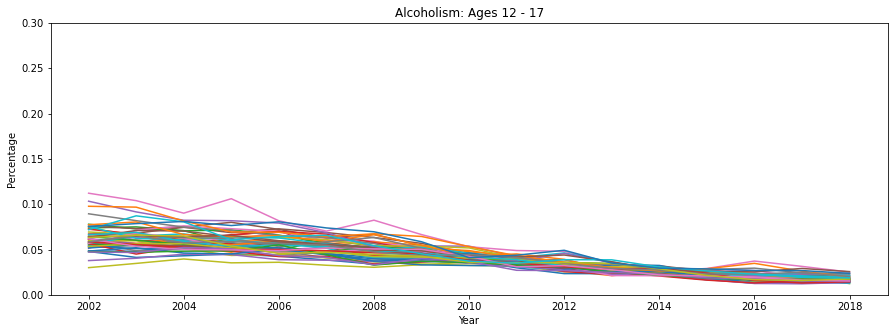

In [21]:
alcohol_pct.set_index("Year").groupby("State")["Rates.Alcohol.Use Disorder Past Year.12-17"].plot.line(
    ylim=(0,0.3), ylabel="Percentage", title="Alcoholism: Ages 12 - 17",figsize=(15,7));

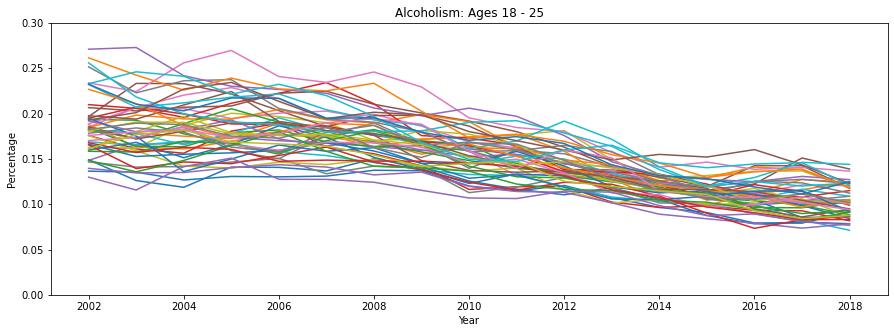

In [22]:
alcohol_pct.set_index("Year").groupby("State")["Rates.Alcohol.Use Disorder Past Year.18-25"].plot.line(
    ylim=(0,0.3), ylabel="Percentage", title="Alcoholism: Ages 18 - 25", figsize=(15,7));

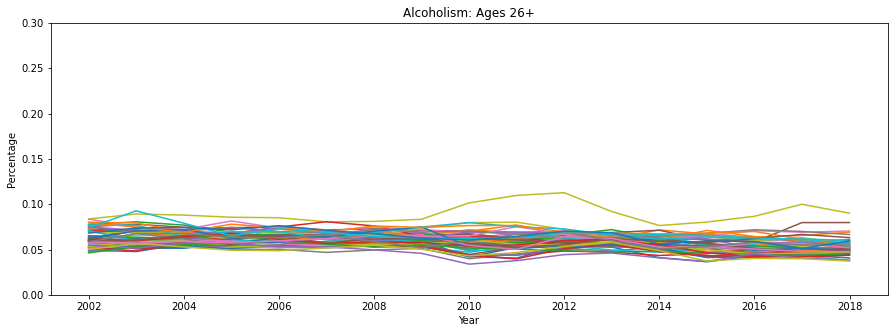

In [23]:
alcohol_pct.set_index("Year").groupby("State")["Rates.Alcohol.Use Disorder Past Year.26+"].plot.line(
    ylim=(0,0.3), ylabel="Percentage", title="Alcoholism: Ages 26+", figsize=(15,7));

As you can see in the previous cells, alcoholism varies greatly by age range. Each line represents a state. For early teens, the rate has dropped in all states in a similar fashion. In the 18 to 25 age range, this varies greatly by state. However, the rate is still decreasing over time. Finally, for the 26+ age range, the rate has stayed pretty consistent over the years. Additionally, all states hover around a similar rate.

### Over time

### States

# Tobacco

In this section we analyze tobacco use in the United States by age group, over time, and by state.

### Age groups

### Over time

### States

# Cocaine

In this section we analyze cocaine use in the United States by age group, over time, and by state.

### Age groups

### Over time

### States

# Marijuana

In this section we analyze marijuana use by age group, over time, and by state.

### Age groups

### Over time

### States